# Well Log Analysis for Carbonate Reservoir characterisation on Python--Himanshu Bhardwaj

**Calculation of Rw from SP log, SW calculation using Archies formulae (Notes: Some codes are intentionally hidden)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import plotly.tools as tls
import plotly.graph_objs as go
import chart_studio.plotly as py

In [2]:
import hemi_plot as hp
import hemi_petro2 as hpt

In [3]:
df = pd.read_csv('file1046462289.csv')
df.head()

Depth    CGXT    SMTU       GRGC        SPCG      FEFE    NPRL      CLDC  \
0  1699.0 -999.25 -999.25  74.655273  342.755129  0.066587 -999.25  8.090829   
1  1699.5 -999.25 -999.25  67.210760  342.312016  0.065862 -999.25  8.090769   
2  1700.0 -999.25 -999.25  61.085746  341.922004  0.065413 -999.25  8.090793   
3  1700.5 -999.25 -999.25  58.320451  341.325809  0.065129 -999.25  8.090767   
4  1701.0 -999.25 -999.25  58.242153  340.563663  0.065534 -999.25  8.090771   

     DCOR     DEN  ...    MNRL    MINV    MBTC      HVOL      AVOL      CTAO  \
0 -999.25 -999.25  ... -999.25 -999.25 -999.25  0.117137  0.063007  0.797272   
1 -999.25 -999.25  ... -999.25 -999.25 -999.25  0.117137  0.063007  0.801656   
2 -999.25 -999.25  ... -999.25 -999.25 -999.25  0.117137  0.063007  0.804623   
3 -999.25 -999.25  ... -999.25 -999.25 -999.25  0.117136  0.063006  0.806937   
4 -999.25 -999.25  ... -999.25 -999.25 -999.25  0.117137  0.063007  0.805297   

          R40O         R60O         RTAO     BIT  
0  1254.277906  1254.277906  1254.277906 -999.25  
1  1247.437483  1247.437483  1247.437483 -999.25  
2  1242.818044  1242.818044  1242.818044 -999.25  
3  1239.256386  1239.256386  1239.256386 -999.25  
4  1241.778078  1241.778078  1241.778078 -999.25  

[5 rows x 28 columns]

In [4]:
df.replace(-999.25, np.nan, inplace=True)

In [5]:
df.describe()

Depth         CGXT         SMTU         GRGC         SPCG  \
count  6363.000000  2454.000000  2560.000000  6253.000000  6363.000000   
mean   3289.500000    98.568467  1546.622353    63.337035   290.166977   
std     918.492107     2.468850   118.778494    32.874748    42.106773   
min    1699.000000    94.927812  1205.273438     5.984358   198.195839   
25%    2494.250000    96.433951  1450.195313    38.626741   256.820516   
50%    3289.500000    98.291152  1546.982422    61.885444   286.113199   
75%    4084.750000    99.937615  1643.994141    82.786658   327.401474   
max    4880.000000   103.657537  1809.804687   383.411561   381.806053   

              FEFE         NPRL         CLDC         DCOR          DEN  ...  \
count  6311.000000  2481.000000  6297.000000  2499.000000  2499.000000  ...   
mean     32.708477    10.826180     9.029681     0.068230     2.543236  ...   
std      50.317452     8.628899     1.339448     0.070987     0.119744  ...   
min       0.063448     0.273855     4.616619     0.008325     1.894458  ...   
25%       4.852656     4.134731     7.970608     0.033213     2.489914  ...   
50%      12.182759     8.787414     8.366693     0.043610     2.574454  ...   
75%      37.556827    14.706571     9.907715     0.065998     2.634214  ...   
max     546.539875    44.898068    12.663260     0.508351     2.711472  ...   

              MNRL         MINV         MBTC         HVOL         AVOL  \
count  2468.000000  2468.000000  2468.000000  6297.000000  6297.000000   
mean     26.299809    32.632376     8.118799     0.149106     0.094982   
std      26.576899    35.707667     0.592221     0.046759     0.046747   
min       1.283025     0.918794     7.421403     0.037488     0.000000   
25%       9.431904     6.659029     7.850075     0.113685     0.059555   
50%      13.590681    15.236960     8.001795     0.125287     0.071157   
75%      38.198160    49.004609     8.119030     0.175638     0.121508   
max     149.608531   178.066764    11.657976     0.286948     0.232818   

              CTAO         R40O         R60O         RTAO       BIT  
count  6350.000000  6350.000000  6350.000000  6350.000000  6317.000  
mean    258.438420    27.265277    26.925801    27.044764     7.875  
std     336.042562    91.075554    92.131317   100.883991     0.000  
min       0.435927     0.474903     0.396189     0.367222     7.875  
25%      46.085590     3.096108     3.032718     3.050282     7.875  
50%     124.695785     8.548365     8.341610     8.063296     7.875  
75%     328.551559    23.827382    22.738708    21.874253     7.875  
max    2723.251607  1852.132577  1852.132577  2294.013464     7.875  

[8 rows x 28 columns]

In [6]:
dt = df
dt.set_index('Depth', inplace=True)

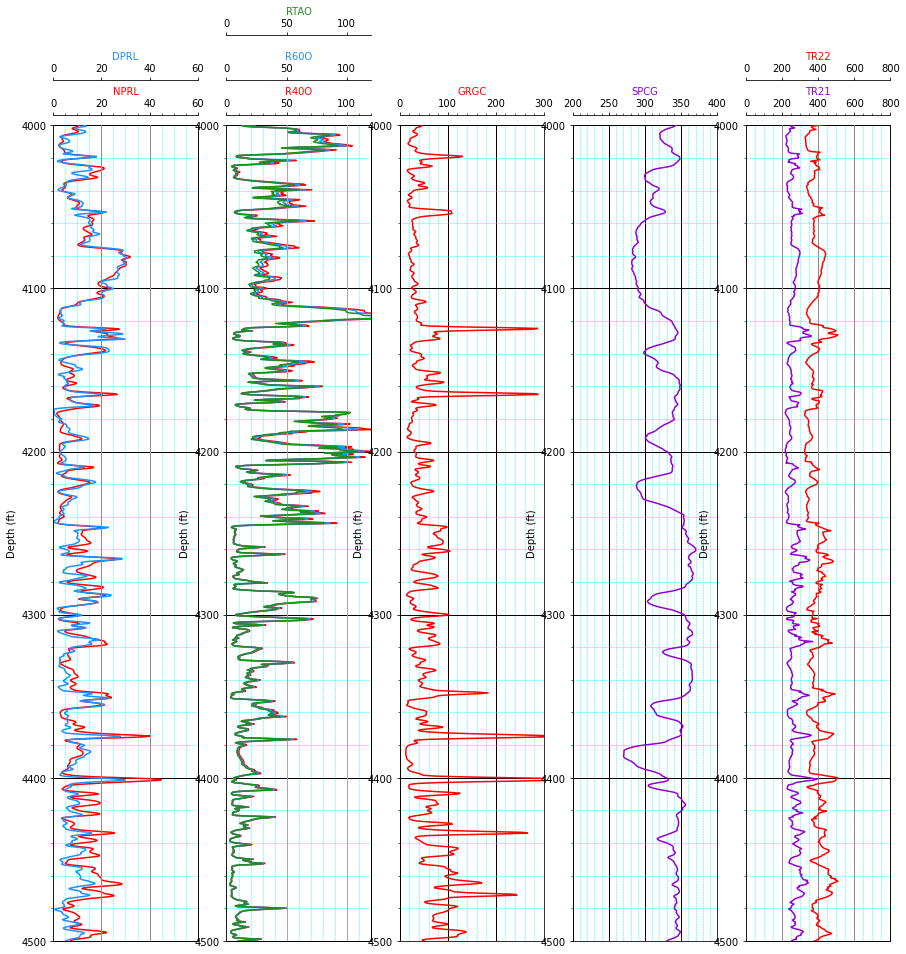

In [7]:
hp.track_plot(dt, track=[['NPRL','DPRL'],['R40O', 'R60O', 'RTAO'],['GRGC'],
                         ['SPCG'], ['TR21','TR22']], depth_range=[4000, 4500], track_range=
          [[[0,60],[0,60]],[[0,120],[0,120],[0,120]],[[0,300]],[[200,400]],[[0,800],[0,800]]])

**Shale base line determination**

In [8]:
d = np.linspace(1750, 5000, 200)
s1 = hpt.shale_base_line(d, x1= [274.414, 2267], x2=[381.80, 4775.5])

In [9]:
d = np.linspace(1750, 5000, 200)
s1 = hpt.shale_base_line(d, x1= [274.414, 2267], x2=[381.80, 4775.5])
t1 = go.Scatter(x=dt['SPCG'], y=dt.index, name = 'SP Log', yaxis='y1')
st = go.Scatter(x=s1, y=d, name='shale base line')
fig1 = go.Figure([t1,st])
fig1['layout'].update(height = 600, width = 400)
fig1.update_yaxes(autorange="reversed")
fig1.update_layout(xaxis={'side': 'top'})

In [10]:
dt['SSP'] = dt['SPCG'] - hpt.shale_base_line(dt.index,x1= [275.73, 2355], x2=[381.80, 4775.5])

In [11]:
dp = dt
dp = dp.dropna()

In [12]:
dt1 = hpt.RW_Corrected(dp, 0.1, 100, log = {'temperature':'CGXT', 'SSP':'SSP'})

D:\Kansas oil and gas\geophysical logs 2017\NewLogs_Oil\hemi_petro2.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\Kansas oil and gas\geophysical logs 2017\NewLogs_Oil\hemi_petro2.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\Kansas oil and gas\geophysical logs 2017\NewLogs_Oil\hemi_petro2.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

**Rw calculated from SP log**

<AxesSubplot:xlabel='Depth'>

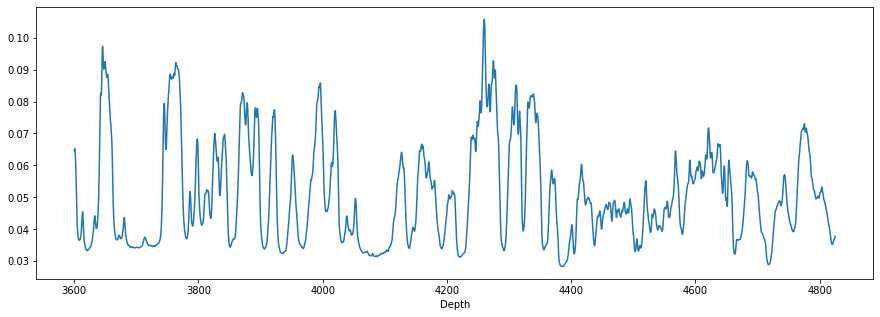

In [13]:
plt.figure(figsize=(15,5))
dt1['Rw'].plot()

In [14]:

a = 1 #for carbonate reservior
m = 2 # cementation factor for carbonate reservoir
n = 2 # exponent for carbonate reservoir
Rmf = 1.1 # Rmf is not known

In [15]:
dt1['True_Porosity'] = hpt.Porosity(dt1)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Calculation of Sw**

In [16]:
hpt.water_saturation(dt1['Rw'], a, m, n, dt1, [dt1.index[0], dt1.index[-1]] )

D:\Kansas oil and gas\geophysical logs 2017\NewLogs_Oil\hemi_petro2.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



CGXT         SMTU       GRGC        SPCG        FEFE       NPRL  \
Depth                                                                           
3600.5   95.003768  1359.238281  47.338353  321.623355   13.363017   9.251863   
3601.0   95.009883  1352.382813  52.808524  322.172485   13.249157   9.497743   
3601.5   95.040047  1372.070313  56.235028  321.985857   14.831440   9.929529   
3602.0   95.090122  1378.203125  58.640986  320.779421   16.047719  10.768185   
3602.5   95.132219  1356.933594  62.869328  319.106259   16.372843  12.073743   
...            ...          ...        ...         ...         ...        ...   
4823.0  102.768679  1728.828125  63.818774  342.851856  128.090886   1.863930   
4823.5  102.672493  1755.488281  62.418369  343.078570  129.219871   1.890305   
4824.0  102.704052  1748.203125  59.972113  343.674574   91.219944   1.956697   
4824.5  102.767157  1742.070312  58.047512  344.400802   82.991492   2.064395   
4825.0  102.632061  1725.585938  57.209516  345.280532   89.714178   2.165706   

            CLDC      DCOR       DEN      PDPE  ...    BIT        SSP  \
Depth                                           ...                     
3600.5  7.924768  0.038006  2.637427  3.712417  ...  7.875  -8.686354   
3601.0  7.921193  0.040396  2.638521  3.688626  ...  7.875  -8.159135   
3601.5  7.915750  0.041520  2.638112  3.725309  ...  7.875  -8.367673   
3602.0  7.896706  0.039514  2.619593  3.781434  ...  7.875  -9.596020   
3602.5  7.876990  0.042989  2.583317  3.747604  ...  7.875 -11.291093   
...          ...       ...       ...       ...  ...    ...        ...   
4823.0  7.880700  0.040828  2.657378  4.792156  ...  7.875 -41.029666   
4823.5  7.880688  0.035364  2.644928  4.758076  ...  7.875 -40.824863   
4824.0  7.880419  0.032119  2.638439  4.651797  ...  7.875 -40.250770   
4824.5  7.879645  0.030986  2.641708  4.538622  ...  7.875 -39.546453   
4825.0  7.878887  0.030232  2.647053  4.482125  ...  7.875 -38.688633   

                K  rmfe/rwe       Rwe      Rw75        Rw         X  \
Depth                                                                 
3600.5  72.635501  1.317008  0.064540  0.080238  0.064503 -0.195467   
3601.0  72.636314  1.295175  0.065628  0.081152  0.065233 -0.194717   
3601.5  72.640326  1.303747  0.065197  0.080789  0.064922 -0.195014   
3602.0  72.646986  1.355474  0.062709  0.078712  0.063223 -0.196731   
3602.5  72.652585  1.430251  0.059430  0.076018  0.061033 -0.198993   
...           ...       ...       ...       ...       ...       ...   
4823.0  73.668234  3.605387  0.023576  0.049367  0.036878 -0.223733   
4823.5  73.655442  3.583176  0.023722  0.049466  0.036985 -0.223632   
4824.0  73.659639  3.519190  0.024153  0.049759  0.037193 -0.223334   
4824.5  73.668032  3.442070  0.024694  0.050128  0.037447 -0.222961   
4825.0  73.650064  3.351996  0.025358  0.050581  0.037832 -0.222503   

        True_Porosity        Sw  
Depth                            
3600.5       7.197532  0.033830  
3601.0       7.337575  0.033588  
3601.5       7.624593  0.032179  
3602.0       8.482497  0.029939  
3602.5      10.016462  0.027399  
...               ...       ...  
4823.0       2.544015  0.012611  
4823.5       3.004521  0.011672  
4824.0       3.266641  0.012800  
4824.5       3.178924  0.013660  
4825.0       3.019995  0.013765  

[2450 rows x 36 columns]